In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import colormaps as cm
from matplotlib.patches import Circle, Rectangle
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from defaults import *
from read_data import *
from plot_functions import *

In [7]:
def print_setup():
    NX, NY, LX, LY, Pr, Le, Ra_T, R_rho, dx, dy, dt, Tfinal, animation_on, plot_dt, plot_var = readSetupFromHDF5(
        '../output/setup.h5')
    print(f'NX = {NX}')
    print(f'NY = {NY}')
    print(f'LX = {LX}')
    print(f'LY = {LY}')
    print(f'Pr = {Pr}')
    print(f'Le = {Le}')
    print(f'Ra_T = {Ra_T}')
    print(f'R_rho = {R_rho}')
    print(f'dx = {dx}')
    print(f'dy = {dy}')
    print(f'dt = {dt}')
    print(f'T = {Tfinal}')
    print(f'animation_on = {animation_on}')
    print(f'plot_dt = {plot_dt}')
    print(f'plot_var = {plot_var}')
    
def get_slice(slice_time, var):
    times, u, v, T, S, p = set_data('../output/results/')
    t = times[slice_time]
    u = u[slice_time]
    v = v[slice_time]
    T = T[slice_time]
    S = S[slice_time]
    p = p[slice_time]
    if var == 'u':
        return u
    elif var == 'v':
        return v
    elif var == 'T':
        return T
    elif var == 'S':
        return S
    elif var == 'p':
        return p
    else:
        print("Invalid variable")
        return None
    

def plot(folder_path, slice_time, plot_var): 
    NX, NY, LX, LY, Pr, Le, Ra_T, R_rho, dx, dy, dt, Tfinal, animation_on, plot_dt, tmp = readSetupFromHDF5('../output/setup.h5')

    color = get_color(plot_var)
    num_frames = get_num_frames(folder_path)
    
    if slice_time < 0 or slice_time >= num_frames:
        print("Slice time out of range")
        return
    
    times, u, v, T, S, p = set_data(folder_path)

    t = times[slice_time]
    u = u[slice_time]
    v = v[slice_time]
    T = T[slice_time]
    S = S[slice_time]
    p = p[slice_time]

    nx = NX - 2
    ny = NY - 2

    X, Y = set_axis(dx, dy, LX, LY, nx, ny)

    # change to whatever you want to plot
    data = set_datablocks(plot_var, u, v, T, S, p)

    Z_MAX, Z_MIN = set_Z_max_min(data)

    plot_args = get_plot_args(dx, LX, LY, Z_MIN, Z_MAX, color)
    plot_args_quiver = get_plot_args_quiver()

    fig, ax = plt.subplots(figsize=(14, 3))

    # Axes and plot customization
    ax.set_xlabel('x', fontsize=12)  # Adjust label as needed
    ax.set_ylabel('y', fontsize=12)  # Adjust label as needed
    # if w_on:
    #     ax.set_title(f'Vorticity in the domain for time step t = {round(t,2)}', fontsize=16)
    # else:
    #     ax.set_title(f'Absolute velocity in the domain for time step t = {round(t,2)}', fontsize=16)  # Example: Add a title
    
    cax = plt.imshow(data, **plot_args)  # 'cax' is the collection or image object returned by imshow

    # add quiver plot with u and v with 1/numth of the points
    num = 8
    uu, vv, XX, YY = u[::num, ::num], v[::num, ::num], X[::num, ::num], Y[::num, ::num]
    # uuvv = np.sqrt(uu**2 + vv**2)
    # uu, vv = uu/uuvv, vv/uuvv
    YY=YY[::-1]
    ax.quiver(XX, YY, uu, vv, **plot_args_quiver)

    # Create colorbar matched to the height of the plot
    cbar = fig.colorbar(cax, ax=ax)  # Ensuring the colorbar matches the height of 'ax'
    cbar.ax.tick_params(labelsize=10) 

    t = plot_dt * slice_time

    ax.set_title(get_title(plot_var, t=t), fontsize=16,y=1.05)  # Example: Add a title

    # if plot_var == 'u':
    #     cbar.set_label(r'$u$', size=16)
    # if plot_var == 'v':
    #     cbar.set_label(r'$v$', size=16)
    # if plot_var == 'uv':
    #     cbar.set_label(r'$\sqrt{u^2+v^2}$', size=16)
    # elif plot_var == 'T':
    #     cbar.set_label(r'Temperature', size=16)
    # elif plot_var == 'S':
    #     cbar.set_label(r'Salinity', size=16)
    # elif plot_var == 'p':
    #     cbar.set_label(r'Pressure', size=16)
    ax.tick_params(axis='both', labelsize=10)  # Adjust tick label size as needed
    
    plt.tight_layout()


def plot_diagram():
  # Define colors for each state
  state_colors = {'S': 'blue', 'T': 'red', 'ST': 'green', 'TS': 'purple'}

  # Plot R_rho vs Le with state colors
  plt.figure(figsize=(8, 6))
  for i in range(len(R_rho)):
      plt.scatter(R_rho[i],
                  Le[i],
                  color=state_colors[states[i]],
                  label=states[i])

  # Set labels and title
  plt.xlabel('R_rho')
  plt.ylabel('Le')
  plt.title('State diagram')
  plt.xscale('log')
  plt.yscale('log')

  # Add legend
  handles = [
      plt.Line2D(
          [0],
          [0],
          marker='o',
          color='w',
          markerfacecolor=color,
          markersize=10,
          label=state) for state,
      color in state_colors.items()]
  plt.legend(handles=handles)

  # Show plot
  plt.grid(True)
  plt.show()

In [3]:
print_setup()

NX = 262
NY = 37
LX = 8.0
LY = 1.0
Pr = 10.0
Le = 163.84
Ra_T = 1.0
R_rho = 655.36
dx = 0.03076923076923077
dy = 0.02857142857142857
dt = 0.001
T = 10.0
animation_on = False
plot_dt = 0.01
plot_var = T


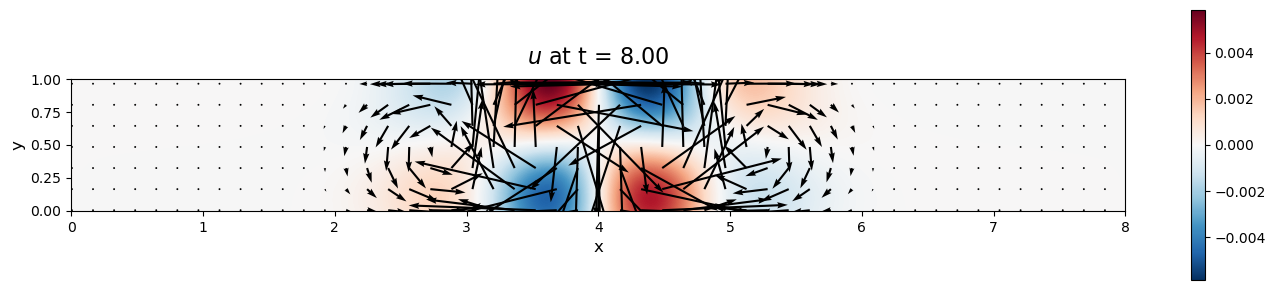

In [4]:
plot("../output/results/", 800, 'u')

# plt.savefig("../data/images/vor_30_circlefin.pdf")
plt.show()

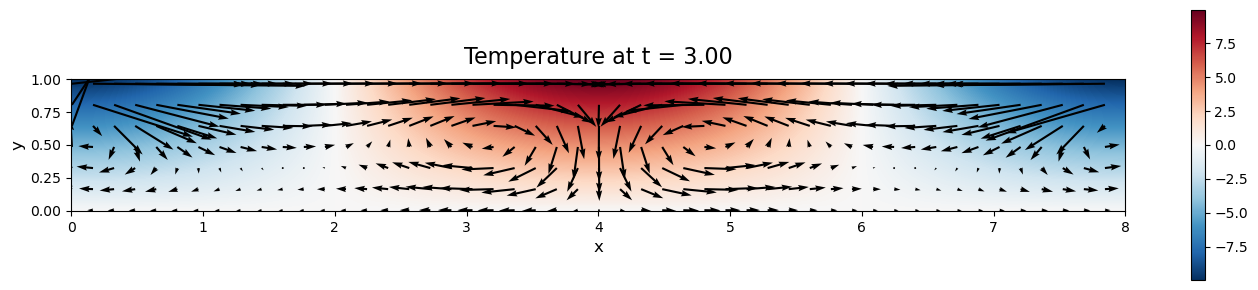

In [11]:
plot("../output/results/", 300, 'T')

# plt.savefig("../data/images/vor_30_circlefin.pdf")
plt.show()

In [5]:
# print all numpy array
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [21]:
N = get_num_frames('../output/results/') - 1
f = get_slice(N, 'u') - get_slice(N-1, 'u')

In [23]:
np.max(np.abs(f))

0.0003759354760947131

In [43]:
get_slice(40, 'p')

array([[ 6.96548904e-04,  6.61434335e-04,  6.05102271e-04, ...,
         6.05102271e-04,  6.61434335e-04,  6.96548904e-04],
       [ 6.11067422e-04,  5.99097394e-04,  5.57986501e-04, ...,
         5.57986501e-04,  5.99097394e-04,  6.11067422e-04],
       [ 5.96957568e-04,  5.83503946e-04,  5.47975082e-04, ...,
         5.47975082e-04,  5.83503946e-04,  5.96957568e-04],
       ...,
       [ 8.49371497e-07,  7.37560959e-07,  1.27240771e-06, ...,
         1.27240771e-06,  7.37560964e-07,  8.49371503e-07],
       [ 3.02936824e-07,  2.43837858e-07,  7.07388874e-07, ...,
         7.07388880e-07,  2.43837864e-07,  3.02936830e-07],
       [-1.31906112e-16, -1.03403396e-08,  4.88905080e-07, ...,
         4.88905086e-07, -1.03403341e-08,  5.08541689e-15]])

In [17]:
filename='../output/Le_Rrho.txt'
R_rho, Le, states, times = read_data_file(filename)


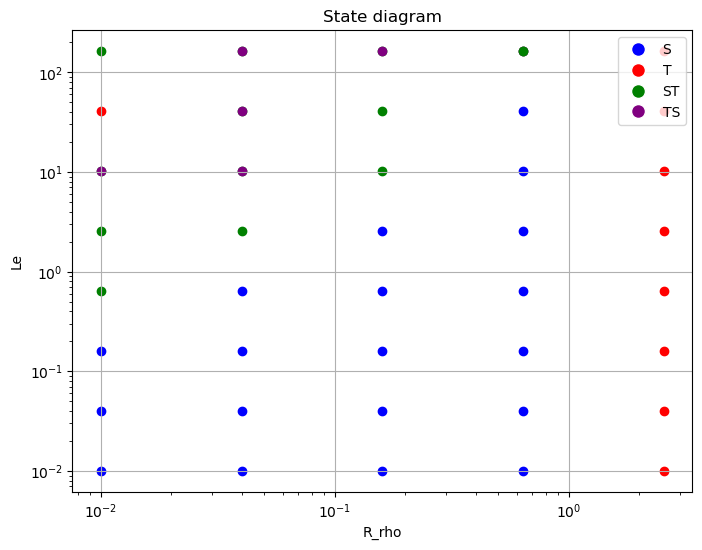

In [18]:
plot_diagram()

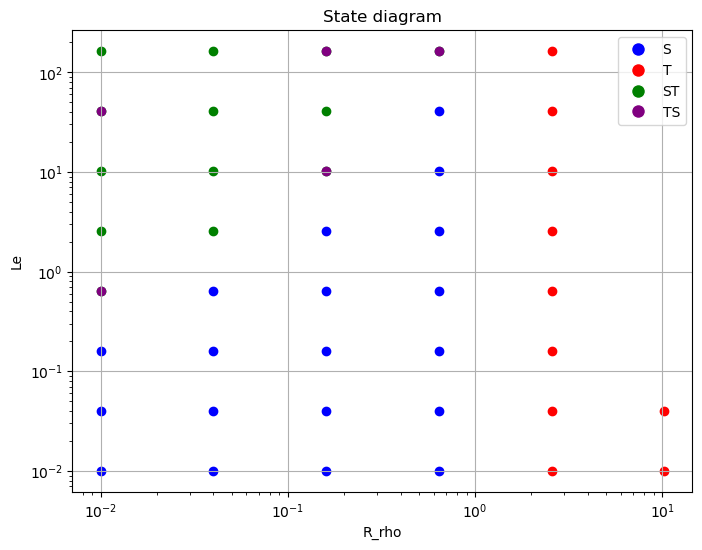

In [14]:
plot_diagram()

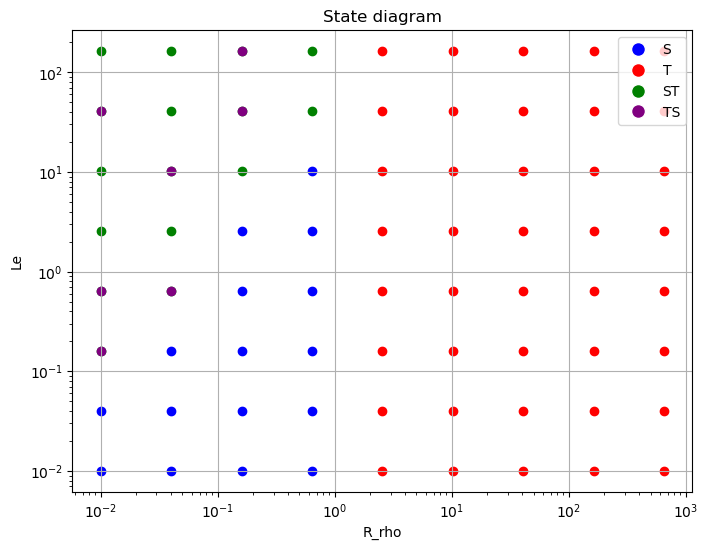

In [8]:
plot_diagram()